In [1]:
from skimage.measure import structural_similarity as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
# the 'Mean Squared Error' between the two images is the sum of the squared difference between the two images;
# NOTE: the two images must have the same dimension return the MSE, the lower the error, the more "similar"
# the two images are
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

In [3]:
# compute the mean squared error and structural similarity index for the images
def compare_images(imageA, imageB, title):
    m = mse(imageA, imageB)
    s = ssim(imageA, imageB)
    
    # setup the figure
    fig = plt.figure(title)
    plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
    
    # show first image
    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(imageA, cmap = plt.cm.gray)
    plt.axis("off")
    
    # show the second image
    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(imageB, cmap = plt.cm.gray)
    plt.axis("off")
    
    # show the images
    plt.show()

In [4]:
# load the images -- the original, the original + contrast,and the original + photoshop
original = cv2.imread("imageA.png")
contrast = cv2.imread("imageB.png")
shopped = cv2.imread("images/jp_gates_photoshopped.png")

# convert the images to grayscale
original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
contrast = cv2.cvtColor(contrast, cv2.COLOR_BGR2GRAY)
shopped = cv2.cvtColor(shopped, cv2.COLOR_BGR2GRAY)

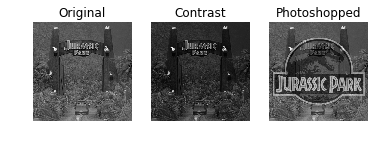

In [5]:
# initialize the figure
fig = plt.figure("Images")
images = ("Original", original), ("Contrast", contrast), ("Photoshopped", shopped)
# loop over the images
for (i, (name, image)) in enumerate(images):
    ax = fig.add_subplot(1, 3, i + 1)
    ax.set_title(name)
    plt.imshow(image, cmap = plt.cm.gray)
    plt.axis("off")

/home/wazir/.virtualenvs/cv/local/lib/python3.5/site-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


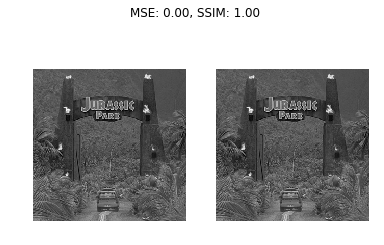

/home/wazir/.virtualenvs/cv/local/lib/python3.5/site-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


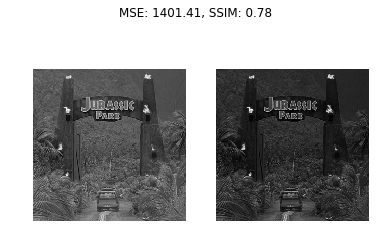

/home/wazir/.virtualenvs/cv/local/lib/python3.5/site-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


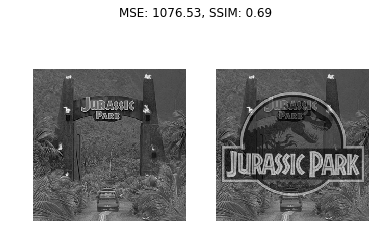

In [6]:
# compare the images
compare_images(original, original, "Original vs. Original")
compare_images(original, contrast, "Original vs. Contrast")
compare_images(original, shopped, "Original vs. Photoshopped")

In [7]:
%matplotlib inline
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from PIL import Image
import time, math
%matplotlib inline
S = 4 #UPSCALING FACTOR

Text(0.5,1,'HR BICUBIC')

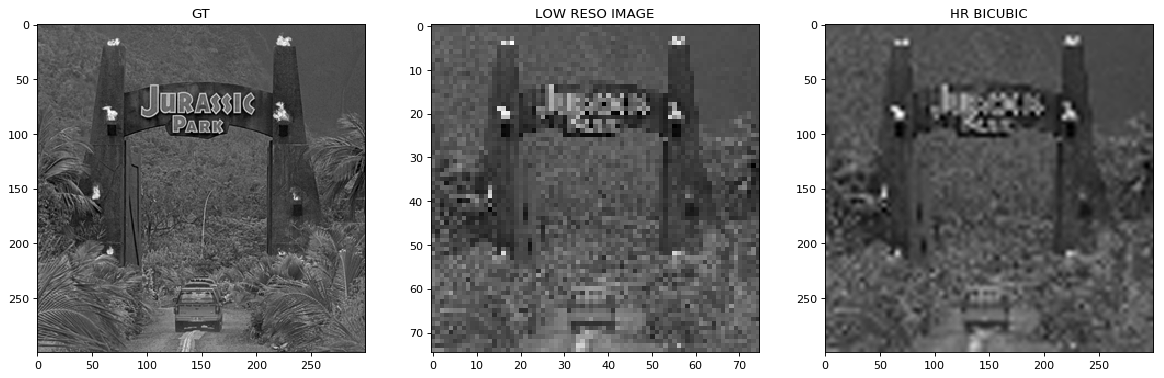

In [8]:
# READ THE GROUND TRUTH REFERENCE IMAGE
ref = cv2.imread(("imageA.png"),0)
res = cv2.resize(ref,None,fx=1/S, fy=1/S, interpolation = cv2.INTER_CUBIC)
res1 = cv2.resize(res,None,fx=S, fy=S, interpolation = cv2.INTER_CUBIC)

fig = plt.figure(figsize = (18,16), dpi = 80)
ax = plt.subplot("131")
ax.imshow(ref, cmap='gray')
ax.set_title("GT")


ax = plt.subplot("132")
ax.imshow(res, cmap='gray')
ax.set_title("LOW RESO IMAGE")



ax = plt.subplot("133")
ax.imshow(res1, cmap = 'gray')
ax.set_title("HR BICUBIC")

In [9]:
# Here is the function for PSNR calculation
def PSNR(res1, ref, shave_border=0):
    height, width = res1.shape[:2]
    res1 = res1[shave_border:height - shave_border, shave_border:width - shave_border]
    ref = ref[shave_border:height - shave_border, shave_border:width - shave_border]
    imdff = res1 - ref
    rmse = math.sqrt(np.mean(imdff ** 2))
    if rmse == 0:
        return 100
    return 20 * math.log10(255.0 / rmse)

In [10]:
psnr_bicubic = PSNR(ref,res1)
print('psnr for bicubic is {}dB'.format(psnr_bicubic))

psnr for bicubic is 30.370478367219857dB
